In [10]:
#分析套件
import twstock
import talib

#基本設定
import numpy as np
import pandas as pd
import datetime

#繪製圖型
import mpl_finance as mpf
import matplotlib.pyplot as plt
%matplotlib inline


In [69]:
#取得5478資料並轉為dataframe
stock_5478 = twstock.Stock('5478')
stock_5478_2018 = stock_5478.fetch_from(2018, 1)
stock_5478_2018_pd = pd.DataFrame(stock_5478_2018)
stock_5478_2018_pd = stock_5478_2018_pd.set_index('date')

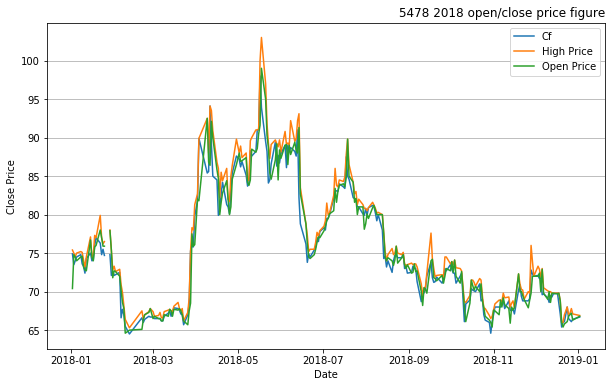

In [36]:
#繪製開收盤圖
fig = plt.figure(figsize=(10, 6))
plt.plot(stock_5478_2018_pd.close, '-', label='Cf')
plt.plot(stock_5478_2018_pd.high, '-', label='High Price')
plt.plot(stock_5478_2018_pd.open, '-', label='Open Price')
plt.title('5478 2018 open/close price figure', loc='right')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True, axis='y')
plt.legend()

/Users/chenyao/anaconda3/envs/pythonenv/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


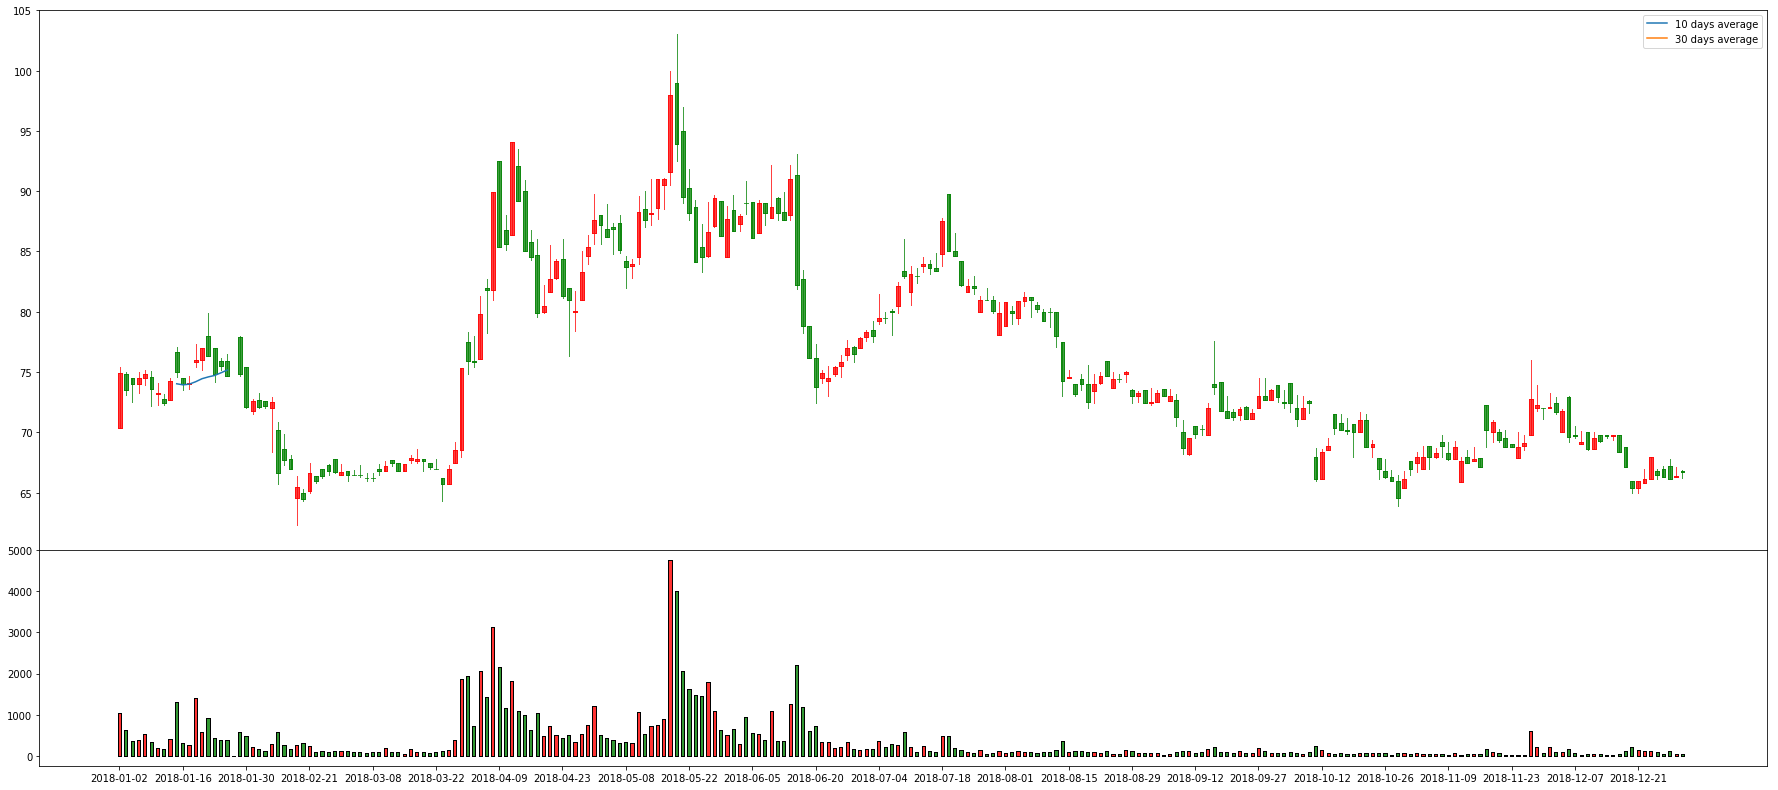

In [74]:
#取得一整年的資料
stock_5478_2018_pd_index = stock_5478_2018_pd.index.format(formatter=lambda x: x.strftime('%Y-%m-%d'))
fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0, 0.2, 1, 0.5])
ax2 = fig.add_axes([0, 0, 1, 0.2])

ax.set_xticks(range(0, len(stock_5478_2018_pd_index), 10))
ax.set_xticklabels(stock_5478_2018_pd_index[::10])
mpf.candlestick2_ochl(ax, stock_5478_2018_pd.open, stock_5478_2018_pd.close, stock_5478_2018_pd.high,
                      stock_5478_2018_pd.low, width=0.6, colorup='r', colordown='g', alpha=0.75)

sma_10 = talib.SMA(np.array(stock_5478_2018_pd.close), 10)
sma_30 = talib.SMA(np.array(stock_5478_2018_pd.close), 30)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10 days average')
ax.plot(sma_30, label='30 days average')
ax.legend()

mpf.volume_overlay(ax2, stock_5478_2018_pd.open, stock_5478_2018_pd.close, stock_5478_2018_pd.transaction, colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(stock_5478_2018_pd_index), 10))
ax2.set_xticklabels(stock_5478_2018_pd_index[::10])

ax.legend();

In [75]:
def stockFig(stock_code, year, month):
    stock = twstock.Stock(stock_code)
    stock_year = stock_5478.fetch_from(year, month)
    stock_year_pd = pd.DataFrame(stock_5478_2018)
    stock_year_pd = stock_year_pd.set_index('date')
    stock_year_pd_index = stock_year_pd.index.format(formatter=lambda x: x.strftime('%Y-%m-%d'))
    fig = plt.figure(figsize=(24, 15))
    ax = fig.add_axes([0, 0.2, 1, 0.5])
    ax2 = fig.add_axes([0, 0, 1, 0.2])
    
    ax.set_xticks(range(0, len(stock_year_pd_index), 10))
    ax.set_xticklabels(stock_year_pd_index[::10])
    mpf.candlestick2_ochl(ax, stock_year_pd.open, stock_year_pd.close, stock_year_pd.high,
                      stock_year_pd.low, width=0.6, colorup='r', colordown='g', alpha=0.75)
    sma_10 = talib.SMA(np.array(stock_year_pd.close), 10)
    sma_30 = talib.SMA(np.array(stock_year_pd.close), 30)
    plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
    ax.plot(sma_10, label='10 days average')
    ax.plot(sma_30, label='30 days average')
    ax.legend()

    mpf.volume_overlay(ax2, stock_year_pd.open, stock_year_pd.close, stock_year_pd.transaction, colorup='r', colordown='g', width=0.5, alpha=0.8)
    ax2.set_xticks(range(0, len(stock_year_pd_index), 10))
    ax2.set_xticklabels(stock_year_pd_index[::10])

    ax.legend();

/Users/chenyao/anaconda3/envs/pythonenv/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


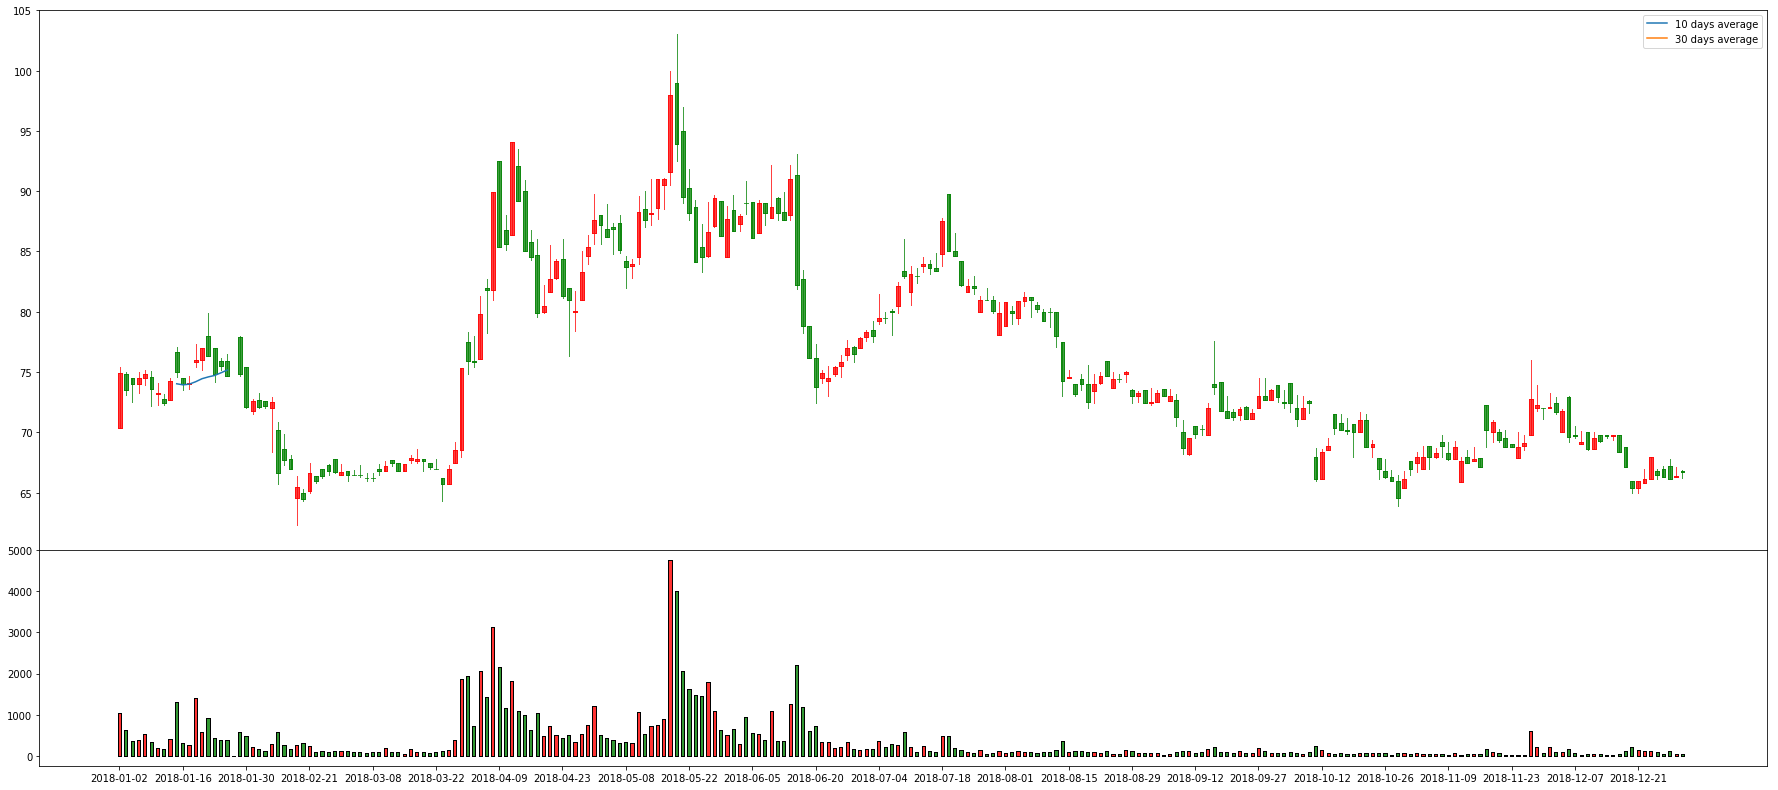

In [76]:
stockFig('5478', 2018, 1)

In [72]:
#print(np.array(stock_5478_2018_pd.close))
print(stock_5478_2018_pd)

            capacity   turnover  open  high   low  close  change  transaction
date                                                                         
2018-01-02   1297000   95283000  70.4  75.4  70.4   74.9     4.8         1031
2018-01-03    801000   59223000  74.8  75.0  73.1   73.5    -1.4          627
2018-01-04    480000   35141000  74.5  74.5  72.5   74.0     0.5          374
2018-01-05    570000   42208000  74.0  75.0  73.3   74.5     0.5          396
2018-01-08    759000   56654000  74.5  75.2  73.9   74.8     0.3          532
2018-01-09    454000   33407000  74.6  75.1  72.2   73.6    -1.2          335
2018-01-10    232000   16979000  73.2  74.1  72.3   73.3    -0.3          190
2018-01-11    185000   13405000  72.8  73.2  72.3   72.4    -0.9          161
2018-01-12    649000   47969000  72.7  74.5  72.7   74.3     1.9          421
2018-01-15   1944000  147548000  76.7  77.1  74.6   75.0     0.7         1299
2018-01-16    334000   24719000  74.5  74.5  73.5   74.0    -1.0